In [1]:
import sys,os, glob
import shutil
import numpy as np

import matplotlib as plt
plt.rcParams['pdf.fonttype'] = 42

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import seaborn as sns

from Bio import SeqIO, SeqRecord
from Bio.Seq import Seq
from Bio.Blast.Applications import NcbiblastnCommandline
from Bio.Blast import NCBIWWW

import fuzzysearch
import re
from collections import Counter, OrderedDict

from fuzzysearch import find_near_matches

/Users/slopez/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
run = '~/msDMP_03_2024-03-04T03_52_24_ac44eff-411734394/msDMP_03-722169473'

os.chdir(run)

In [4]:
samples = pd.read_excel("samples.xlsx")[["sample_name", "Description", "Sub-Library Owner", 'run']]
samples

,sample_name,Description,Sub-Library Owner,run
0,msDMP_03_121,BW25113_565_naive,SCL,A
1,msDMP_03_122,hfq_565_naive,SCL,A
2,msDMP_03_123,fur_565_naive,SCL,A
3,msDMP_03_124,yfcQ_565_naive,SCL,A
4,msDMP_03_125,yccF_565_naive,SCL,A
5,msDMP_03_126,yacL_565_naive,SCL,A
6,msDMP_03_127,hflC_565_naive,SCL,A
7,msDMP_03_128,hflK_565_naive,SCL,A
8,msDMP_03_129,clpA_565_naive,SCL,A
9,msDMP_03_130,baeS_565_naive,SCL,A


In [6]:
print ("="*60)
for file in glob.glob("ms*"):
    fn = file.split("-ds")[0]
    condition = samples["Description"][samples["sample_name"]==fn].to_string(index=False)
    owner = samples["Sub-Library Owner"][samples["sample_name"]==fn].to_string(index=False)
    print (fn)
    os.chdir(file)
    r1 = glob.glob("*R1_001*")[0]
    print (r1)
    print ("\ntrimming files\n")
    cmd = "sickle se -f {0} -t sanger \
            -o trimmed_R1.fastq".format(r1)
    os.system(cmd)
    print ("="*60)
    os.chdir(run)
os.chdir(run)

msKDC_08_79_L001
msKDC-08-79_S77_L001_R1_001.fastq.gz

trimming files


FastQ records kept: 62735
FastQ records discarded: 22

msKDC_08_85_L001
msKDC-08-85_S83_L001_R1_001.fastq.gz

trimming files


FastQ records kept: 58514
FastQ records discarded: 15

msKDC_08_84_L001
msKDC-08-84_S82_L001_R1_001.fastq.gz

trimming files


FastQ records kept: 47846
FastQ records discarded: 11

msKDC_08_94_L001
msKDC-08-94_S92_L001_R1_001.fastq.gz

trimming files


FastQ records kept: 34120
FastQ records discarded: 10

msKDC_08_91_L001
msKDC-08-91_S89_L001_R1_001.fastq.gz

trimming files


FastQ records kept: 44293
FastQ records discarded: 17

msKDC_08_88_L001
msKDC-08-88_S86_L001_R1_001.fastq.gz

trimming files


FastQ records kept: 38969
FastQ records discarded: 14

msKDC_08_78_L001
msKDC-08-78_S76_L001_R1_001.fastq.gz

trimming files


FastQ records kept: 56902
FastQ records discarded: 21

msKDC_08_95_L001
msKDC-08-95_S93_L001_R1_001.fastq.gz

trimming files


FastQ records kept: 66601
FastQ records

In [5]:
Repeat = 'GTGTTCCCCGCGCCAGCGGGGATAAACC'
old_1 = 'GGCAAAAACCGGGCAATCGCAAAAAGGCGTAAT'

# Sets the overall fuzziness
dist_repeat = 4
dist_oldSPCRs = 5
dict_data = {}

In [6]:
def spacer_recurs(r):
    Repeat = 'GTGTTCCCCGCGCCAGCGGGGATAAACC'
    old_1 = 'GGCAAAAACCGGGCAATCGCAAAAAGGCGTAAT'
    old_2 = 'TGTGTTTGCGGCATTAACGCTCACCAGCATTTC'
    ''' 
    takes a sequence, extracts the left most spacer.
    this happens until it sees an old spacer. 
    returns a trimmed read and the new spacers, if any.
    '''    
    if len(find_near_matches(Repeat, r, max_l_dist=3))>=2: # there are at least two repeats
        matches = find_near_matches(Repeat, r, max_l_dist=3)
        _spacer = r[matches[0].end : matches[1].start]
        
        if ((len(find_near_matches(old_1, _spacer, max_l_dist=4))>0) or (len(find_near_matches(old_2, _spacer, max_l_dist=4))>0)):
            return (r, 'old', 'old')
        else:
            r = r[matches[1].start:]
            #print (r, new_spacer)
            return (r, _spacer, 'new')

In [13]:
os.chdir(run)

barcode_44 = 'TATGGCTG'
barcode_69 = 'GACGACAG'
barcode_121 = 'TAAAGTCG'

fastq_reads = "trimmed_R1.fastq"
print ("="*60)

new_spacers_all = {}
counts_all = {}

for file in glob.glob("ms*"):
    fn = file.split("_L1")[0]
    print (fn)
    condition = samples["Description"][samples["sample_name"]==fn].to_string(index=False)    
    print (condition)
    
    all_reads_str = []
    counts_all[fn] = {"parental_R1": 0,
                        "expanded_R1": 0,
                     "parental_R2": 0,
                        "expanded_R2": 0,
                     "parental_R3": 0,
                        "expanded_R3": 0}        
    
    print (fn + " -- " + condition)
    os.chdir(file)

    filename = glob.glob("*.fastq.gz")

    for seq_record in SeqIO.parse(fastq_reads, "fastq"):
        all_reads_str.append(str(seq_record.seq))
    read_counter = Counter(all_reads_str)
    
    new_spacers_all[fn] = []
    
    for read in read_counter:
        rep = ''
        
        in_1 = find_near_matches(barcode_44, read[:20], max_l_dist=1)
        in_2 = find_near_matches(barcode_69, read[:20], max_l_dist=1)
        in_3 = find_near_matches(barcode_121, read[:20], max_l_dist=1)
        
        if len(in_1)>0:
            rep = 'R1'
        if len(in_2)>0:
            rep = 'R2'
        if len(in_3)>0:
            rep = 'R3'
        
        L_match = find_near_matches('AATAATAGGTTATGTTTAGA', read, max_l_dist=3)
        rep_matches = find_near_matches(Repeat, read, max_l_dist=3)
        if len(L_match)>0 and len(rep_matches)>1 and len(rep)>0:
            r = read[L_match[0].end:]
            # recursively extract spacers from read
            flag = 'new'
            found_new = False
            while (flag!='old' and len(find_near_matches(Repeat, r, max_l_dist=3))>1):
                r, spacer, flag = spacer_recurs(r)             
                if flag !='old':
                    found_new = True
                    new_spacers_all[fn].extend([spacer]*read_counter[read])
            if found_new:
                counts_all[fn]['expanded_{0}'.format(rep)]+= read_counter[read]
            else: 
                counts_all[fn]['parental_{0}'.format(rep)]+= read_counter[read]          
        else:
            pass
    try:
        print ("adaptation rate rep1: ", 100.0*counts_all[fn]['expanded_R1']/(counts_all[fn]['expanded_R1']+counts_all[fn]['parental_R1']))
        print ("adaptation rate rep2: ", 100.0*counts_all[fn]['expanded_R2']/(counts_all[fn]['expanded_R2']+counts_all[fn]['parental_R2']))
        print ("adaptation rate rep3: ", 100.0*counts_all[fn]['expanded_R3']/(counts_all[fn]['expanded_R3']+counts_all[fn]['parental_R3']))
    except:
        print ('sample seq failed')
    os.chdir(run)

msDMP_03_158
yebT _565_naive
msDMP_03_158 -- yebT _565_naive
adaptation rate rep1:  5.287446886343811
adaptation rate rep2:  5.59496685998343
adaptation rate rep3:  6.105896032443776
msDMP_03_154
tig_565_naive
msDMP_03_154 -- tig_565_naive
adaptation rate rep1:  6.563706563706564
adaptation rate rep2:  7.078810759792355
adaptation rate rep3:  5.38860103626943
msDMP_03_129
clpA_565_naive
msDMP_03_129 -- clpA_565_naive
adaptation rate rep1:  2.899906454630496
adaptation rate rep2:  3.399668325041459
adaptation rate rep3:  4.087193460490464
msDMP_03_124
yfcQ_565_naive
msDMP_03_124 -- yfcQ_565_naive
adaptation rate rep1:  4.518950437317784
adaptation rate rep2:  3.658536585365854
adaptation rate rep3:  3.254067584480601
msDMP_03_161
yhdW_565_naive
msDMP_03_161 -- yhdW_565_naive
adaptation rate rep1:  2.7772863966035732
adaptation rate rep2:  3.216726980297547
adaptation rate rep3:  3.1548757170172084
msDMP_03_143
rcsA_565_naive
msDMP_03_143 -- rcsA_565_naive
adaptation rate rep1:  7.985649

In [17]:
df_counts_all = pd.DataFrame.from_dict(counts_all).T.reset_index()

In [18]:
df_counts_all

,index,parental_R1,expanded_R1,parental_R2,expanded_R2,parental_R3,expanded_R3
0,msDMP_03_158,33658,1879,36463,2161,33108,2153
1,msDMP_03_154,1694,119,1969,150,1826,104
2,msDMP_03_129,1038,31,1165,41,1056,45
3,msDMP_03_124,655,31,790,30,773,26
4,msDMP_03_161,5496,157,7221,240,6078,198
5,msDMP_03_143,6925,601,7723,562,7992,834
6,msDMP_03_162,37982,4531,47056,3779,44905,3598
7,msDMP_03_127,4198,53,5244,83,5158,49
8,msDMP_03_136,1912,177,2193,150,2402,211
9,msDMP_03_131,4204,409,4693,463,4424,385


In [19]:
# save spacer data
import json

with open('new_spacers_msDMP3.json', 'w') as fp:
    json.dump(new_spacers_all, fp)

In [20]:
df_counts_description = pd.merge(left = df_counts_all, right = samples, left_on= 'index', right_on = 'sample_name')

In [21]:
df_counts_description

,index,parental_R1,expanded_R1,parental_R2,expanded_R2,parental_R3,expanded_R3,sample_name,Description,Sub-Library Owner,run
0,msDMP_03_158,33658,1879,36463,2161,33108,2153,msDMP_03_158,yebT _565_naive,SCL,A
1,msDMP_03_154,1694,119,1969,150,1826,104,msDMP_03_154,tig_565_naive,SCL,A
2,msDMP_03_129,1038,31,1165,41,1056,45,msDMP_03_129,clpA_565_naive,SCL,A
3,msDMP_03_124,655,31,790,30,773,26,msDMP_03_124,yfcQ_565_naive,SCL,A
4,msDMP_03_161,5496,157,7221,240,6078,198,msDMP_03_161,yhdW_565_naive,SCL,A
5,msDMP_03_143,6925,601,7723,562,7992,834,msDMP_03_143,rcsA_565_naive,SCL,A
6,msDMP_03_162,37982,4531,47056,3779,44905,3598,msDMP_03_162,ygfB_565_naive,SCL,A
7,msDMP_03_127,4198,53,5244,83,5158,49,msDMP_03_127,hflC_565_naive,SCL,A
8,msDMP_03_136,1912,177,2193,150,2402,211,msDMP_03_136,pspA _565_naive,SCL,A
9,msDMP_03_131,4204,409,4693,463,4424,385,msDMP_03_131,baeR _565_naive,SCL,A


In [22]:
df_counts_description['pct_expanded_R1'] = 100.0*df_counts_description['expanded_R1'] / (df_counts_description['expanded_R1']+df_counts_description['parental_R1'])
df_counts_description['pct_expanded_R2'] = 100.0*df_counts_description['expanded_R2'] / (df_counts_description['expanded_R2']+df_counts_description['parental_R2'])
df_counts_description['pct_expanded_R3'] = 100.0*df_counts_description['expanded_R3'] / (df_counts_description['expanded_R3']+df_counts_description['parental_R3'])

In [23]:
df_counts_description

,index,parental_R1,expanded_R1,parental_R2,expanded_R2,parental_R3,expanded_R3,sample_name,Description,Sub-Library Owner,run,pct_expanded_R1,pct_expanded_R2,pct_expanded_R3
0,msDMP_03_158,33658,1879,36463,2161,33108,2153,msDMP_03_158,yebT _565_naive,SCL,A,5.287447,5.594967,6.105896
1,msDMP_03_154,1694,119,1969,150,1826,104,msDMP_03_154,tig_565_naive,SCL,A,6.563707,7.078811,5.388601
2,msDMP_03_129,1038,31,1165,41,1056,45,msDMP_03_129,clpA_565_naive,SCL,A,2.899906,3.399668,4.087193
3,msDMP_03_124,655,31,790,30,773,26,msDMP_03_124,yfcQ_565_naive,SCL,A,4.518950,3.658537,3.254068
4,msDMP_03_161,5496,157,7221,240,6078,198,msDMP_03_161,yhdW_565_naive,SCL,A,2.777286,3.216727,3.154876
5,msDMP_03_143,6925,601,7723,562,7992,834,msDMP_03_143,rcsA_565_naive,SCL,A,7.985650,6.783343,9.449354
6,msDMP_03_162,37982,4531,47056,3779,44905,3598,msDMP_03_162,ygfB_565_naive,SCL,A,10.657916,7.433855,7.418098
7,msDMP_03_127,4198,53,5244,83,5158,49,msDMP_03_127,hflC_565_naive,SCL,A,1.246765,1.558100,0.941041
8,msDMP_03_136,1912,177,2193,150,2402,211,msDMP_03_136,pspA _565_naive,SCL,A,8.472954,6.402049,8.075010
9,msDMP_03_131,4204,409,4693,463,4424,385,msDMP_03_131,baeR _565_naive,SCL,A,8.866248,8.979829,8.005822


In [24]:
df_counts_description = df_counts_description.sort_values('run')
df_counts_description

,index,parental_R1,expanded_R1,parental_R2,expanded_R2,parental_R3,expanded_R3,sample_name,Description,Sub-Library Owner,run,pct_expanded_R1,pct_expanded_R2,pct_expanded_R3
0,msDMP_03_158,33658,1879,36463,2161,33108,2153,msDMP_03_158,yebT _565_naive,SCL,A,5.287447,5.594967,6.105896
23,msDMP_03_130,2860,249,3763,335,3761,336,msDMP_03_130,baeS_565_naive,SCL,A,8.009006,8.174719,8.201123
24,msDMP_03_151,4290,178,5137,183,4738,149,msDMP_03_151,zraR_565_naive,SCL,A,3.983885,3.439850,3.048905
25,msDMP_03_122,6536,463,8478,450,8261,450,msDMP_03_122,hfq_565_naive,SCL,A,6.615231,5.040323,5.165882
26,msDMP_03_128,440,31,590,15,601,33,msDMP_03_128,hflK_565_naive,SCL,A,6.581741,2.479339,5.205047
27,msDMP_03_135,345,47,356,57,356,58,msDMP_03_135,pspF _565_naive,SCL,A,11.989796,13.801453,14.009662
28,msDMP_03_137,35332,2073,45661,2172,44804,2532,msDMP_03_137,pspB _565_naive,SCL,A,5.542040,4.540798,5.348994
29,msDMP_03_146,2956,150,5171,273,8062,419,msDMP_03_146,uvrY_565_naive,SCL,A,4.829363,5.014695,4.940455
30,msDMP_03_142,4247,294,5736,310,6421,381,msDMP_03_142,rcsD_565_naive,SCL,A,6.474345,5.127357,5.601294
22,msDMP_03_232,2,0,2,0,0,0,msDMP_03_232,BW25113_565+826_naive,SCL,A,0.000000,0.000000,NaN


In [25]:
df_counts_description.to_csv('naive_adaptation_msDMP3.csv', sep= '\t')

### normalise pct expanded arrays to WT adaptation rate for each run

In [27]:
df_av_wt = df_counts_description[(df_counts_description['Description'].str.contains('BW25113_565_naive'))][['sample_name','pct_expanded_R1', 'pct_expanded_R2', 'pct_expanded_R3','Description', 'run']]

display(df_av_wt)
df_av_wt_A = df_av_wt[df_av_wt['run'] == 'A']
df_av_wt_B = df_av_wt[df_av_wt['run'] == 'B']

mean_A = np.mean(np.array(df_av_wt_A.mean(axis=1)))
mean_B = np.mean(np.array(df_av_wt_B.mean(axis=1)))

print (mean_A, mean_B)

,sample_name,pct_expanded_R1,pct_expanded_R2,pct_expanded_R3,Description,run
35,msDMP_03_121,3.872054,4.858934,4.571429,BW25113_565_naive,A


4.43413887092048 nan


/var/folders/r1/g3bcq6hn03x0br8dy2l82yr40000gq/T/ipykernel_51560/2985170647.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_A = np.mean(np.array(df_av_wt_A.mean(axis=1)))
/Users/slopez/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/slopez/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [28]:
norm_wt_A = df_counts_description[df_counts_description['run']== 'A'][['pct_expanded_R1', 'pct_expanded_R2', 'pct_expanded_R3']]/mean_A
norm_wt_B = df_counts_description[df_counts_description['run']== 'B'][['pct_expanded_R1', 'pct_expanded_R2', 'pct_expanded_R3']]/mean_B

norm_wt_A

,pct_expanded_R1,pct_expanded_R2,pct_expanded_R3
0,1.192441,1.261793,1.377020
23,1.806215,1.843587,1.849541
24,0.898458,0.775765,0.687598
25,1.491886,1.136708,1.165025
26,1.484334,0.559148,1.173858
27,2.703974,3.112544,3.159500
28,1.249857,1.024054,1.206321
29,1.089132,1.130929,1.114186
30,1.460113,1.156337,1.263220
22,0.000000,0.000000,NaN


In [29]:
df_normalised_all = norm_wt_A.append(norm_wt_B)

/var/folders/r1/g3bcq6hn03x0br8dy2l82yr40000gq/T/ipykernel_51560/1494670673.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_normalised_all = norm_wt_A.append(norm_wt_B)#.append(norm_wt_D).append(norm_wt_E)


In [30]:
df_normalised_all

,pct_expanded_R1,pct_expanded_R2,pct_expanded_R3
0,1.192441,1.261793,1.377020
23,1.806215,1.843587,1.849541
24,0.898458,0.775765,0.687598
25,1.491886,1.136708,1.165025
26,1.484334,0.559148,1.173858
27,2.703974,3.112544,3.159500
28,1.249857,1.024054,1.206321
29,1.089132,1.130929,1.114186
30,1.460113,1.156337,1.263220
22,0.000000,0.000000,NaN


In [31]:
df_counts_description[['pct_expanded_R1_norm', 'pct_expanded_R2_norm', 'pct_expanded_R3_norm']] = df_normalised_all
df_counts_description

,index,parental_R1,expanded_R1,parental_R2,expanded_R2,parental_R3,expanded_R3,sample_name,Description,Sub-Library Owner,run,pct_expanded_R1,pct_expanded_R2,pct_expanded_R3,pct_expanded_R1_norm,pct_expanded_R2_norm,pct_expanded_R3_norm
0,msDMP_03_158,33658,1879,36463,2161,33108,2153,msDMP_03_158,yebT _565_naive,SCL,A,5.287447,5.594967,6.105896,1.192441,1.261793,1.377020
23,msDMP_03_130,2860,249,3763,335,3761,336,msDMP_03_130,baeS_565_naive,SCL,A,8.009006,8.174719,8.201123,1.806215,1.843587,1.849541
24,msDMP_03_151,4290,178,5137,183,4738,149,msDMP_03_151,zraR_565_naive,SCL,A,3.983885,3.439850,3.048905,0.898458,0.775765,0.687598
25,msDMP_03_122,6536,463,8478,450,8261,450,msDMP_03_122,hfq_565_naive,SCL,A,6.615231,5.040323,5.165882,1.491886,1.136708,1.165025
26,msDMP_03_128,440,31,590,15,601,33,msDMP_03_128,hflK_565_naive,SCL,A,6.581741,2.479339,5.205047,1.484334,0.559148,1.173858
27,msDMP_03_135,345,47,356,57,356,58,msDMP_03_135,pspF _565_naive,SCL,A,11.989796,13.801453,14.009662,2.703974,3.112544,3.159500
28,msDMP_03_137,35332,2073,45661,2172,44804,2532,msDMP_03_137,pspB _565_naive,SCL,A,5.542040,4.540798,5.348994,1.249857,1.024054,1.206321
29,msDMP_03_146,2956,150,5171,273,8062,419,msDMP_03_146,uvrY_565_naive,SCL,A,4.829363,5.014695,4.940455,1.089132,1.130929,1.114186
30,msDMP_03_142,4247,294,5736,310,6421,381,msDMP_03_142,rcsD_565_naive,SCL,A,6.474345,5.127357,5.601294,1.460113,1.156337,1.263220
22,msDMP_03_232,2,0,2,0,0,0,msDMP_03_232,BW25113_565+826_naive,SCL,A,0.000000,0.000000,NaN,0.000000,0.000000,NaN


In [32]:
df_counts_description.to_csv('naive_adaptation_msDMP3_norm.csv', sep= '\t')

In [33]:
plot_gp = 'A'
df_to_plot = df_counts_description[df_counts_description['run'] == plot_gp]

In [34]:
df_to_plot

,index,parental_R1,expanded_R1,parental_R2,expanded_R2,parental_R3,expanded_R3,sample_name,Description,Sub-Library Owner,run,pct_expanded_R1,pct_expanded_R2,pct_expanded_R3,pct_expanded_R1_norm,pct_expanded_R2_norm,pct_expanded_R3_norm
0,msDMP_03_158,33658,1879,36463,2161,33108,2153,msDMP_03_158,yebT _565_naive,SCL,A,5.287447,5.594967,6.105896,1.192441,1.261793,1.377020
23,msDMP_03_130,2860,249,3763,335,3761,336,msDMP_03_130,baeS_565_naive,SCL,A,8.009006,8.174719,8.201123,1.806215,1.843587,1.849541
24,msDMP_03_151,4290,178,5137,183,4738,149,msDMP_03_151,zraR_565_naive,SCL,A,3.983885,3.439850,3.048905,0.898458,0.775765,0.687598
25,msDMP_03_122,6536,463,8478,450,8261,450,msDMP_03_122,hfq_565_naive,SCL,A,6.615231,5.040323,5.165882,1.491886,1.136708,1.165025
26,msDMP_03_128,440,31,590,15,601,33,msDMP_03_128,hflK_565_naive,SCL,A,6.581741,2.479339,5.205047,1.484334,0.559148,1.173858
27,msDMP_03_135,345,47,356,57,356,58,msDMP_03_135,pspF _565_naive,SCL,A,11.989796,13.801453,14.009662,2.703974,3.112544,3.159500
28,msDMP_03_137,35332,2073,45661,2172,44804,2532,msDMP_03_137,pspB _565_naive,SCL,A,5.542040,4.540798,5.348994,1.249857,1.024054,1.206321
29,msDMP_03_146,2956,150,5171,273,8062,419,msDMP_03_146,uvrY_565_naive,SCL,A,4.829363,5.014695,4.940455,1.089132,1.130929,1.114186
30,msDMP_03_142,4247,294,5736,310,6421,381,msDMP_03_142,rcsD_565_naive,SCL,A,6.474345,5.127357,5.601294,1.460113,1.156337,1.263220
22,msDMP_03_232,2,0,2,0,0,0,msDMP_03_232,BW25113_565+826_naive,SCL,A,0.000000,0.000000,NaN,0.000000,0.000000,NaN


/Users/slopez/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/slopez/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3399: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/slopez/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/slopez/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/slopez/opt/anaconda3/lib/python3.8/site-packa

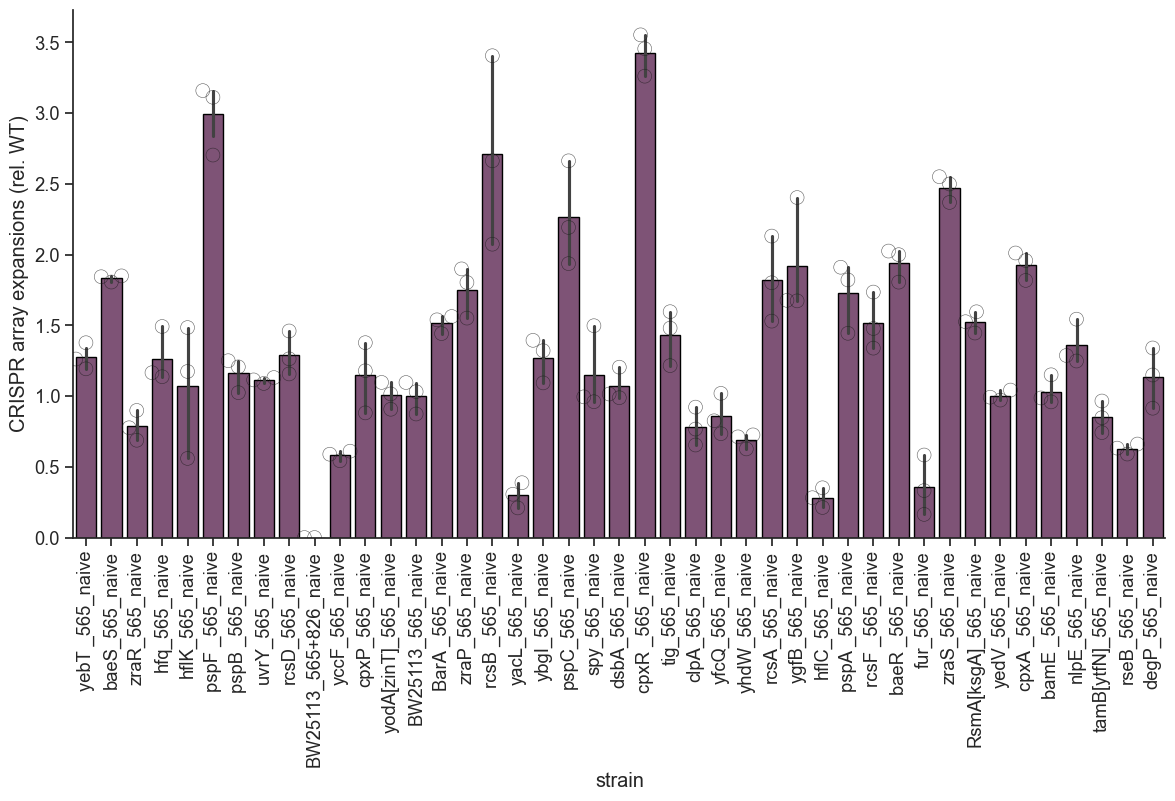

In [35]:
sns.set(font_scale = 1.2)
sns.set_style("ticks")

g = sns.catplot(x="Description", y='value',
    data=pd.melt(df_to_plot[['Description', 'pct_expanded_R1_norm', 'pct_expanded_R2_norm','pct_expanded_R3_norm']], ['Description']), dodge = True,
    height= 6.27, aspect=2, kind="swarm", fc='none', edgecolor='k',linewidth=0.4, s=100, alpha = 0.7,
                legend = False)

sns.barplot(x="Description", y='value',
    data=pd.melt(df_to_plot[['Description', 'pct_expanded_R1_norm', 'pct_expanded_R2_norm','pct_expanded_R3_norm']], ['Description']), 
            color = sns.color_palette("ch:s=-.2,r=.6", 7)[4], edgecolor='black')#, ax = g)

g.set(xlabel='strain', ylabel='CRISPR array expansions (rel. WT)',#yscale ="log",
       )

g.set_xticklabels(rotation=90)

g.savefig("naive_adaptation_norm_msDMP3_{0}.pdf".format(plot_gp))

______________